In [3]:
import pandas 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.utils import to_categorical 
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

2024-11-06 12:37:28.293502: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Набор данных загружается напрямую с помощью pandas. Затем необходимо разделить 
атрибуты (столбцы) на 60 входных параметров (X) и 1 выходной (Y). 

In [4]:
dataframe = pandas.read_csv("sonar.all-data", header=None) 
dataset = dataframe.values 
X = dataset[:,0:60].astype(float) 
Y = dataset[:,60] 


Выходные параметры представлены строками (“R” и “M”), которые необходимо перевести 
в целочисленные значения 0 и 1 соответственно. Для этого применяется LabelEncoder из 
scikit-learn. 

In [5]:
encoder = LabelEncoder() 
encoder.fit(Y) 
encoded_Y = encoder.transform(Y)

Теперь можно задать базовую архитектуру сети. 

In [6]:
model = Sequential() 
model.add(Dense(60, input_dim=60, kernel_initializer='normal', activation='relu')) 
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid')) 

Чтобы  подготовить  сеть  к  обучению,  нужно  настроить  еще  три  параметра  для  этапа 
компиляции: 
1. функцию потерь, которая определяет, как сеть должна оценивать качество своей 
работы  на  обучающих  данных  и,  соответственно,  как  корректировать  ее  в 
правильном  направлении;  Для  задач  бинарной  классификации  применяется 
функция **binary crossentropy.** 
2. оптимизатор — механизм, с помощью которого сеть будет обновлять себя, опираясь 
на наблюдаемые данные и функцию потерь; 
3. метрики для мониторинга на этапах обучения и тестирования —  здесь нас будет 
интересовать  только  точность  (доля  правильно  классифицированных 
изображений).

In [7]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy']) 

Теперь можно начинать обучение сети, для чего в случае использования библиотеки Keras 
достаточно вызвать метод fit сети — он пытается адаптировать (fit) модель под обучающие 
данные.

In [8]:
history = model.fit(X, encoded_Y, epochs=100, batch_size=10, validation_split=0.1) 

Epoch 1/100
19/19 [==============================] - 1s 11ms/step - loss: 0.6913 - accuracy: 0.5561 - val_loss: 0.6914 - val_accuracy: 0.3810
Epoch 2/100
19/19 [==============================] - 0s 3ms/step - loss: 0.6854 - accuracy: 0.6203 - val_loss: 0.6862 - val_accuracy: 0.6667
Epoch 3/100
19/19 [==============================] - 0s 3ms/step - loss: 0.6781 - accuracy: 0.6898 - val_loss: 0.6972 - val_accuracy: 0.3810
Epoch 4/100
19/19 [==============================] - 0s 3ms/step - loss: 0.6698 - accuracy: 0.6417 - val_loss: 0.6998 - val_accuracy: 0.3810
Epoch 5/100
19/19 [==============================] - 0s 3ms/step - loss: 0.6561 - accuracy: 0.7219 - val_loss: 0.7173 - val_accuracy: 0.3810
Epoch 6/100
19/19 [==============================] - 0s 3ms/step - loss: 0.6424 - accuracy: 0.6845 - val_loss: 0.7038 - val_accuracy: 0.3810
Epoch 7/100
19/19 [==============================] - 0s 3ms/step - loss: 0.6192 - accuracy: 0.7380 - val_loss: 0.7469 - val_accuracy: 0.3333
Epoch 8/100


In [14]:
def plot_model_comparison(histories, model_names=None):
    if model_names is None:
        model_names = [f"Model {i+1}" for i in range(len(histories))]
    
    for i, history in enumerate(histories):
        plt.plot(history.history['loss'], label=f'{model_names[i]} - Training Loss')
        plt.plot(history.history['val_loss'], label=f'{model_names[i]} - Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Comparison of Training and Validation Loss')
    plt.legend()
    plt.show()
    
    for i, history in enumerate(histories):
        plt.plot(history.history['accuracy'], label=f'{model_names[i]} - Training Accuracy')
        plt.plot(history.history['val_accuracy'], label=f'{model_names[i]} - Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Comparison of Training and Validation Accuracy')
    plt.legend()
    plt.show()

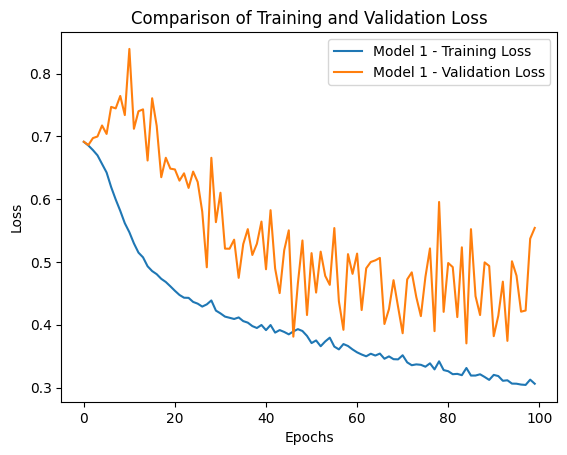

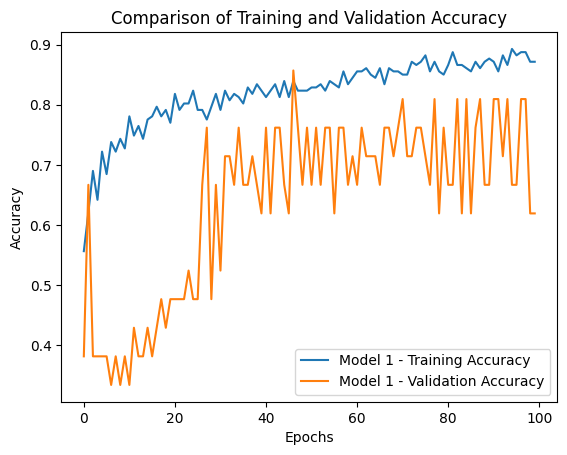

In [16]:
plot_model_comparison([history])

В процессе обучения отображаются четыре величины: потери сети на обучающих данных 
и  точность  сети  на  обучающих  данных,  а  также  потери  и  точность  на  данных,  не 
участвовавших в обучении. 
В  представленном  наборе  данных  присутствует  некоторая  избыточность,  т.к.  с  разных 
углов описывается один и тот же сигнал. Вероятно, что некоторые углы отражения сигнала 
имеют большую значимость, чем другие. Изменение количества нейронов во входном слое 
напрямую влияет на количество признаков, с которыми будет работать нейронная сеть.

Необходимо уменьшить размер входного слоя в два раза и сравнить с результатами 
первоначальной архитектуры. 

In [17]:
decrease_model = Sequential((
    Dense(60, input_dim=30, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='sigmoid') 
))

decrease_model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy']) 
history2 = model.fit(X, encoded_Y, epochs=100, batch_size=10, validation_split=0.1) 

Epoch 1/100
19/19 [==============================] - 0s 5ms/step - loss: 0.3025 - accuracy: 0.8770 - val_loss: 0.4806 - val_accuracy: 0.7143
Epoch 2/100
19/19 [==============================] - 0s 3ms/step - loss: 0.2955 - accuracy: 0.8824 - val_loss: 0.4969 - val_accuracy: 0.6667
Epoch 3/100
19/19 [==============================] - 0s 3ms/step - loss: 0.2950 - accuracy: 0.8984 - val_loss: 0.5062 - val_accuracy: 0.6667
Epoch 4/100
19/19 [==============================] - 0s 3ms/step - loss: 0.2969 - accuracy: 0.8770 - val_loss: 0.4157 - val_accuracy: 0.8095
Epoch 5/100
19/19 [==============================] - 0s 3ms/step - loss: 0.2952 - accuracy: 0.8877 - val_loss: 0.5181 - val_accuracy: 0.6190
Epoch 6/100
19/19 [==============================] - 0s 3ms/step - loss: 0.2902 - accuracy: 0.8930 - val_loss: 0.4647 - val_accuracy: 0.7143
Epoch 7/100
19/19 [==============================] - 0s 3ms/step - loss: 0.2890 - accuracy: 0.8877 - val_loss: 0.4464 - val_accuracy: 0.7619
Epoch 8/100
1

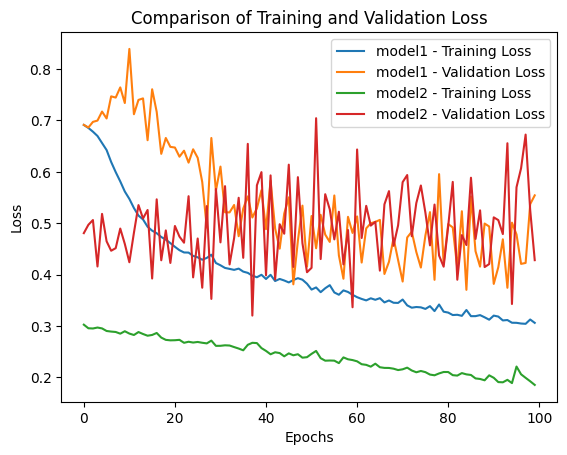

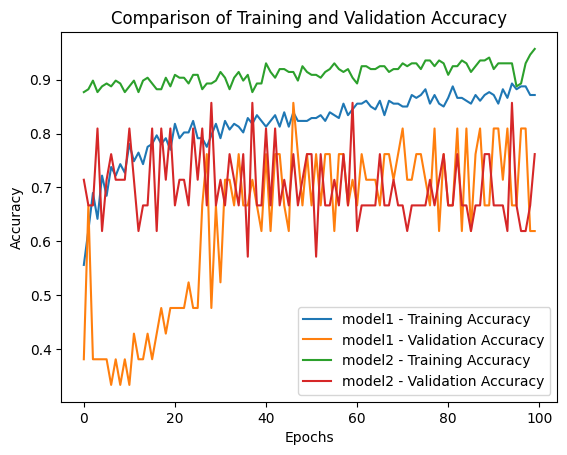

In [18]:
plot_model_comparison(histories=[history, history2], model_names=["model1", "model2"])

Делаем вывод, что уменьшение колличества нейронов привело только к улучшению обучения модели

Нейронная сеть с несколькими слоями позволяет находить закономерности не только во 
входных данных, но и в их комбинации. Также, дополнительные слои позволяют ввести 
нелинейность в сеть, что позволяет получать более высокую точность. 


Необходимо добавить промежуточный (скрытый) слой Dense в архитектуру сети с 
15 нейронами и проанализировать результаты.

In [35]:
model3 = Sequential((
    Dense(30, input_dim=60, kernel_initializer='normal', activation='relu'),
    Dense(15, activation= 'relu'),
    Dense(1, kernel_initializer='normal', activation='sigmoid') 
))

model3.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy']) 
history3 = model.fit(X, encoded_Y, epochs=100, batch_size=10, validation_split=0.1) 

Epoch 1/100
19/19 [==============================] - 0s 6ms/step - loss: 0.0321 - accuracy: 1.0000 - val_loss: 0.1602 - val_accuracy: 0.8571
Epoch 2/100
19/19 [==============================] - 0s 3ms/step - loss: 0.0346 - accuracy: 0.9947 - val_loss: 0.2201 - val_accuracy: 0.8571
Epoch 3/100
19/19 [==============================] - 0s 3ms/step - loss: 0.0317 - accuracy: 1.0000 - val_loss: 0.1836 - val_accuracy: 0.8571
Epoch 4/100
19/19 [==============================] - 0s 3ms/step - loss: 0.0320 - accuracy: 1.0000 - val_loss: 0.1508 - val_accuracy: 0.8571
Epoch 5/100
19/19 [==============================] - 0s 3ms/step - loss: 0.0322 - accuracy: 1.0000 - val_loss: 0.1830 - val_accuracy: 0.8571
Epoch 6/100
19/19 [==============================] - 0s 3ms/step - loss: 0.0332 - accuracy: 1.0000 - val_loss: 0.1897 - val_accuracy: 0.8571
Epoch 7/100
19/19 [==============================] - 0s 3ms/step - loss: 0.0341 - accuracy: 1.0000 - val_loss: 0.1381 - val_accuracy: 0.9524
Epoch 8/100
1

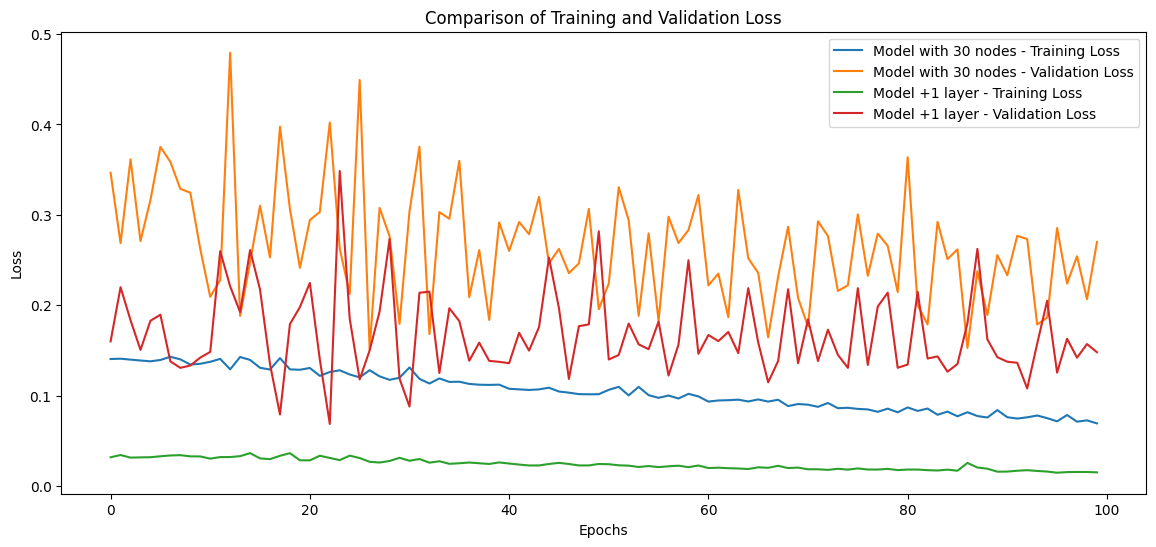

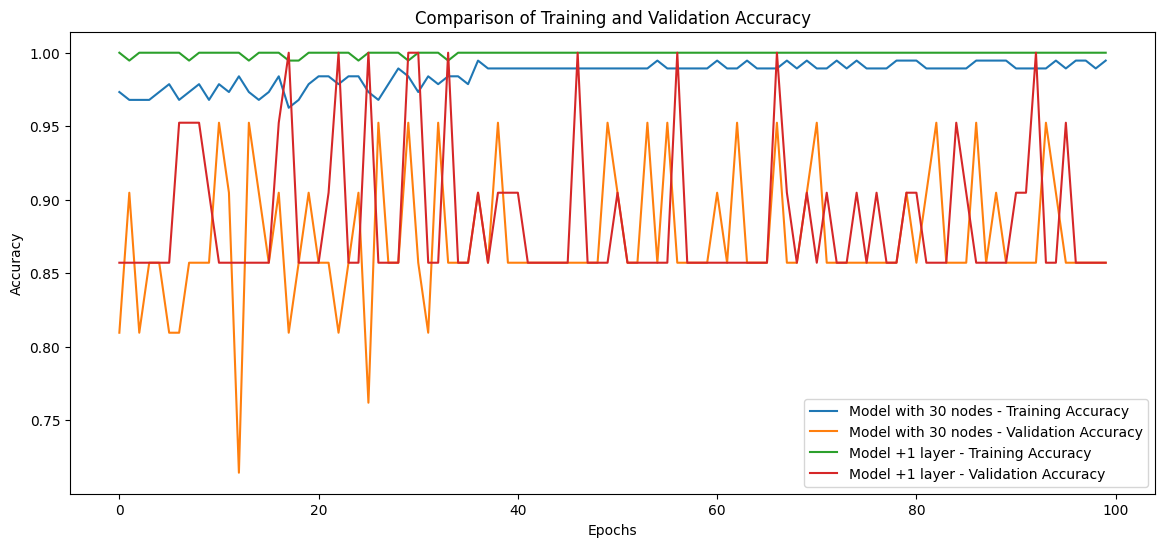

In [36]:
plot_model_comparison(histories=[history2, history3], model_names=["Model with 30 nodes", "Model +1 layer"])

Добавление еще одного слоя привело к улучшению способности моделей к распознаванию